In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import joblib
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df = df.drop(['Unnamed: 32','id'],axis=1)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [13]:
df.diagnosis = df.diagnosis.replace(['M','B'],[1,0])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


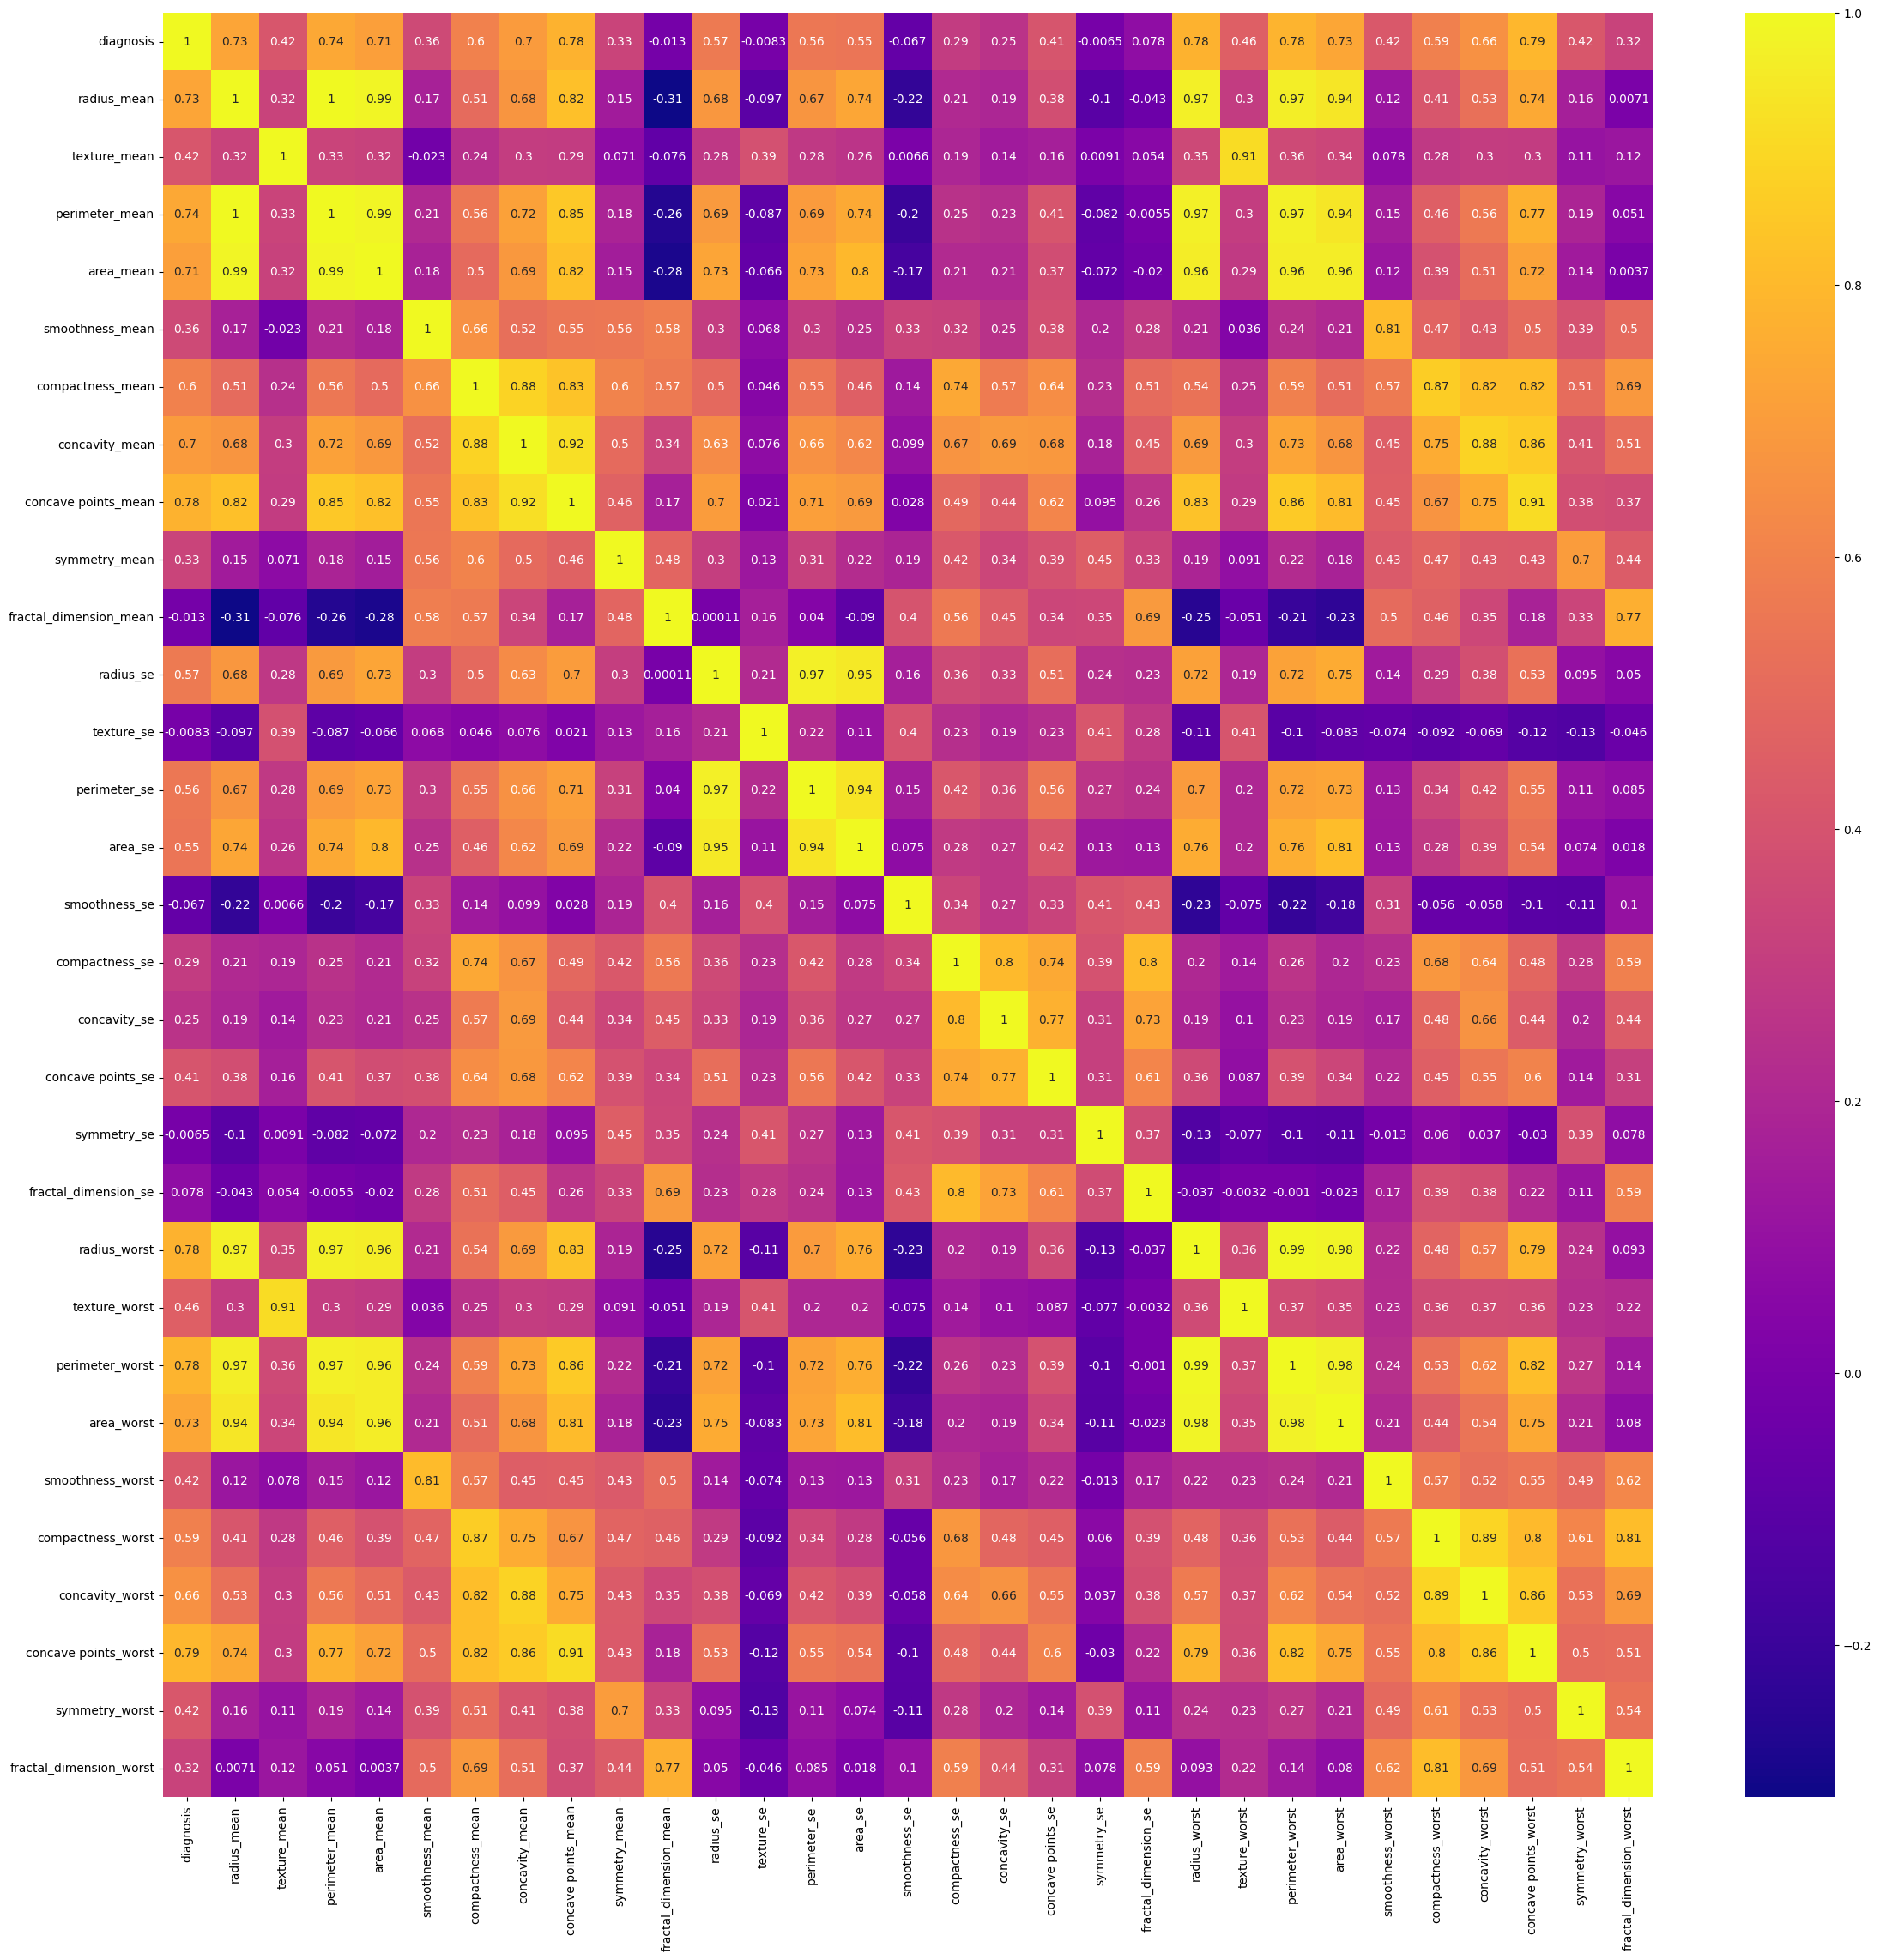

In [17]:
#Now check the correlation matrixs
corr = df.corr()
plt.figure(figsize=(28,27))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

In [20]:
x = df.drop(['diagnosis'],axis=1)
y = df.diagnosis

#Apply the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selections
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#objects
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
lgb = LGBMClassifier()
cat = CatBoostClassifier()

#Fittings
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [21]:

rf.fit(x_train_scaled,y_train)
gb.fit(x_train_scaled,y_train)

GradientBoostingClassifier()

In [22]:
xgb.fit(x_train_scaled,y_train)
svc.fit(x_train_scaled,y_train)

SVC()

In [23]:
knn.fit(x_train_scaled,y_train)
nb.fit(x_train_scaled,y_train)

GaussianNB()

In [ ]:
lgb.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)

In [25]:
#preds
lrpred = lr.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
svcpred = svc.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
nbpred = nb.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import accuracy_score
lracc = accuracy_score(y_test,lrpred)
rfacc = accuracy_score(y_test,rfpred)
gbacc = accuracy_score(y_test,gbpred)
xgbacc = accuracy_score(y_test,xgbpred)
svcacc = accuracy_score(y_test,svcpred)
knnacc = accuracy_score(y_test,knnpred)
nbacc = accuracy_score(y_test,nbpred)
lgbacc = accuracy_score(y_test,lgbpred)
catacc = accuracy_score(y_test,catpred)

print('LOGISTIC REG',lracc)
print('RANDOM FOREST',rfacc)
print('GB',gbacc)
print('XGB',xgbacc)
print('SVC',svcacc)
print('KNN',knnacc)
print('NB',nbacc)
print('LIGHT GBM',lgbacc)
print('CATO',catacc)

LOGISTIC REG 0.9736842105263158
RANDOM FOREST 0.956140350877193
GB 0.956140350877193
XGB 0.956140350877193
SVC 0.9824561403508771
KNN 0.9473684210526315
NB 0.9649122807017544
LIGHT GBM 0.9649122807017544
CATO 0.9736842105263158


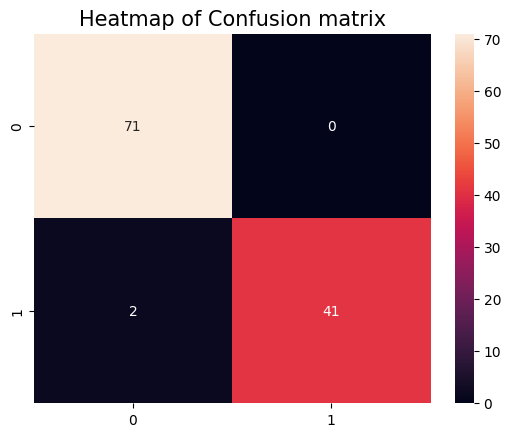

In [26]:
#NOW CHECK THE CONFUSION MATRIX(for specific model)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,svcpred) #Enter the model pred here
plt.title('Heatmap of Confusion matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [27]:

#NOW CHECK THE CLASSIFICATION REPORT 
#NOW we will check the classification report
print(classification_report(y_test,svcpred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [30]:
#(TO CHECK IF THE MODEL HAS OVERFITTED OR UNDERFITTED)

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(estimator=svc,X=x_train_scaled,y=y_train)
print('Cross Val Acc Score of SVC model is ---> ',cross_val)
print('\n Cross Val Mean Acc Score of SVC model is ---> ',cross_val.mean())

Cross Val Acc Score of SVC model is --->  [0.97802198 0.96703297 0.98901099 0.98901099 0.95604396]

 Cross Val Mean Acc Score of SVC model is --->  0.9758241758241759


In [31]:

#NOW save the model
import pickle
 
#Saving the model
pickle.dump(svc,open('breast_cancer_svc.pickle','wb'))

#loading the model 
breast_cancer_svc_model = pickle.load(open('breast_cancer_svc.pickle','rb'))

#Predicting the output
y_pred = breast_cancer_svc_model.predict(x_test_scaled)

#confusion matrix
print('Confusion matrix of SVC model : \n', confusion_matrix(y_test,y_pred),'\n')

#showing off the accuracy score
print('Accuracy Score on testing data by svc model is ---> ',accuracy_score(y_test,y_pred))

Confusion matrix of SVC model : 
 [[71  0]
 [ 2 41]] 

Accuracy Score on testing data by svc model is --->  0.9824561403508771
